<div style="background-color: lightgreen; padding: 10px;">
    <h2> Projeto | Machine Learning - Problema de Classificação
</div>

### Aluno:
André R. Kuster | nº: 1116029

### Objetivo:

Este projeto visa aplicar os conceitos aprendidos na disciplina de **Machine Learning 1** em um contexto prático, usando um conjunto de dados disponível no Kaggle Datasets. Nosso objetivo é praticar a implementação de um algoritmo de classificação utilizando a biblioteca Scikit-learn, calcular as métricas de avaliação dos modelos e otimizar os hiperparâmetros.

### Base de Dados:
Será utilizado conjunto de dados de clientes de uma empresa de telecomunicação. A base contém variáveis explicativas (features) sobre a assinatura, sobre o uso dos serviços contratados pelos clientes, como número de chamadas durante o dia, durante a noite, bem como uma informação sobre o número de chamados no suporte que esse cliente fez. A variável dependente (target) consiste no **churn**, que é positivo caso o cliente tenha cancelado a sua assinatura, enquanto o negativo representa um cliente ativo.

### Motivação:

A motivação do projeto é comparar a performance dos algoritmos **KNN** e **Random Forest** para um problema de classificação antes e depois da otimização de hiperparâmetros e chegar a uma conclusão sobre o modelo que melhor performou.

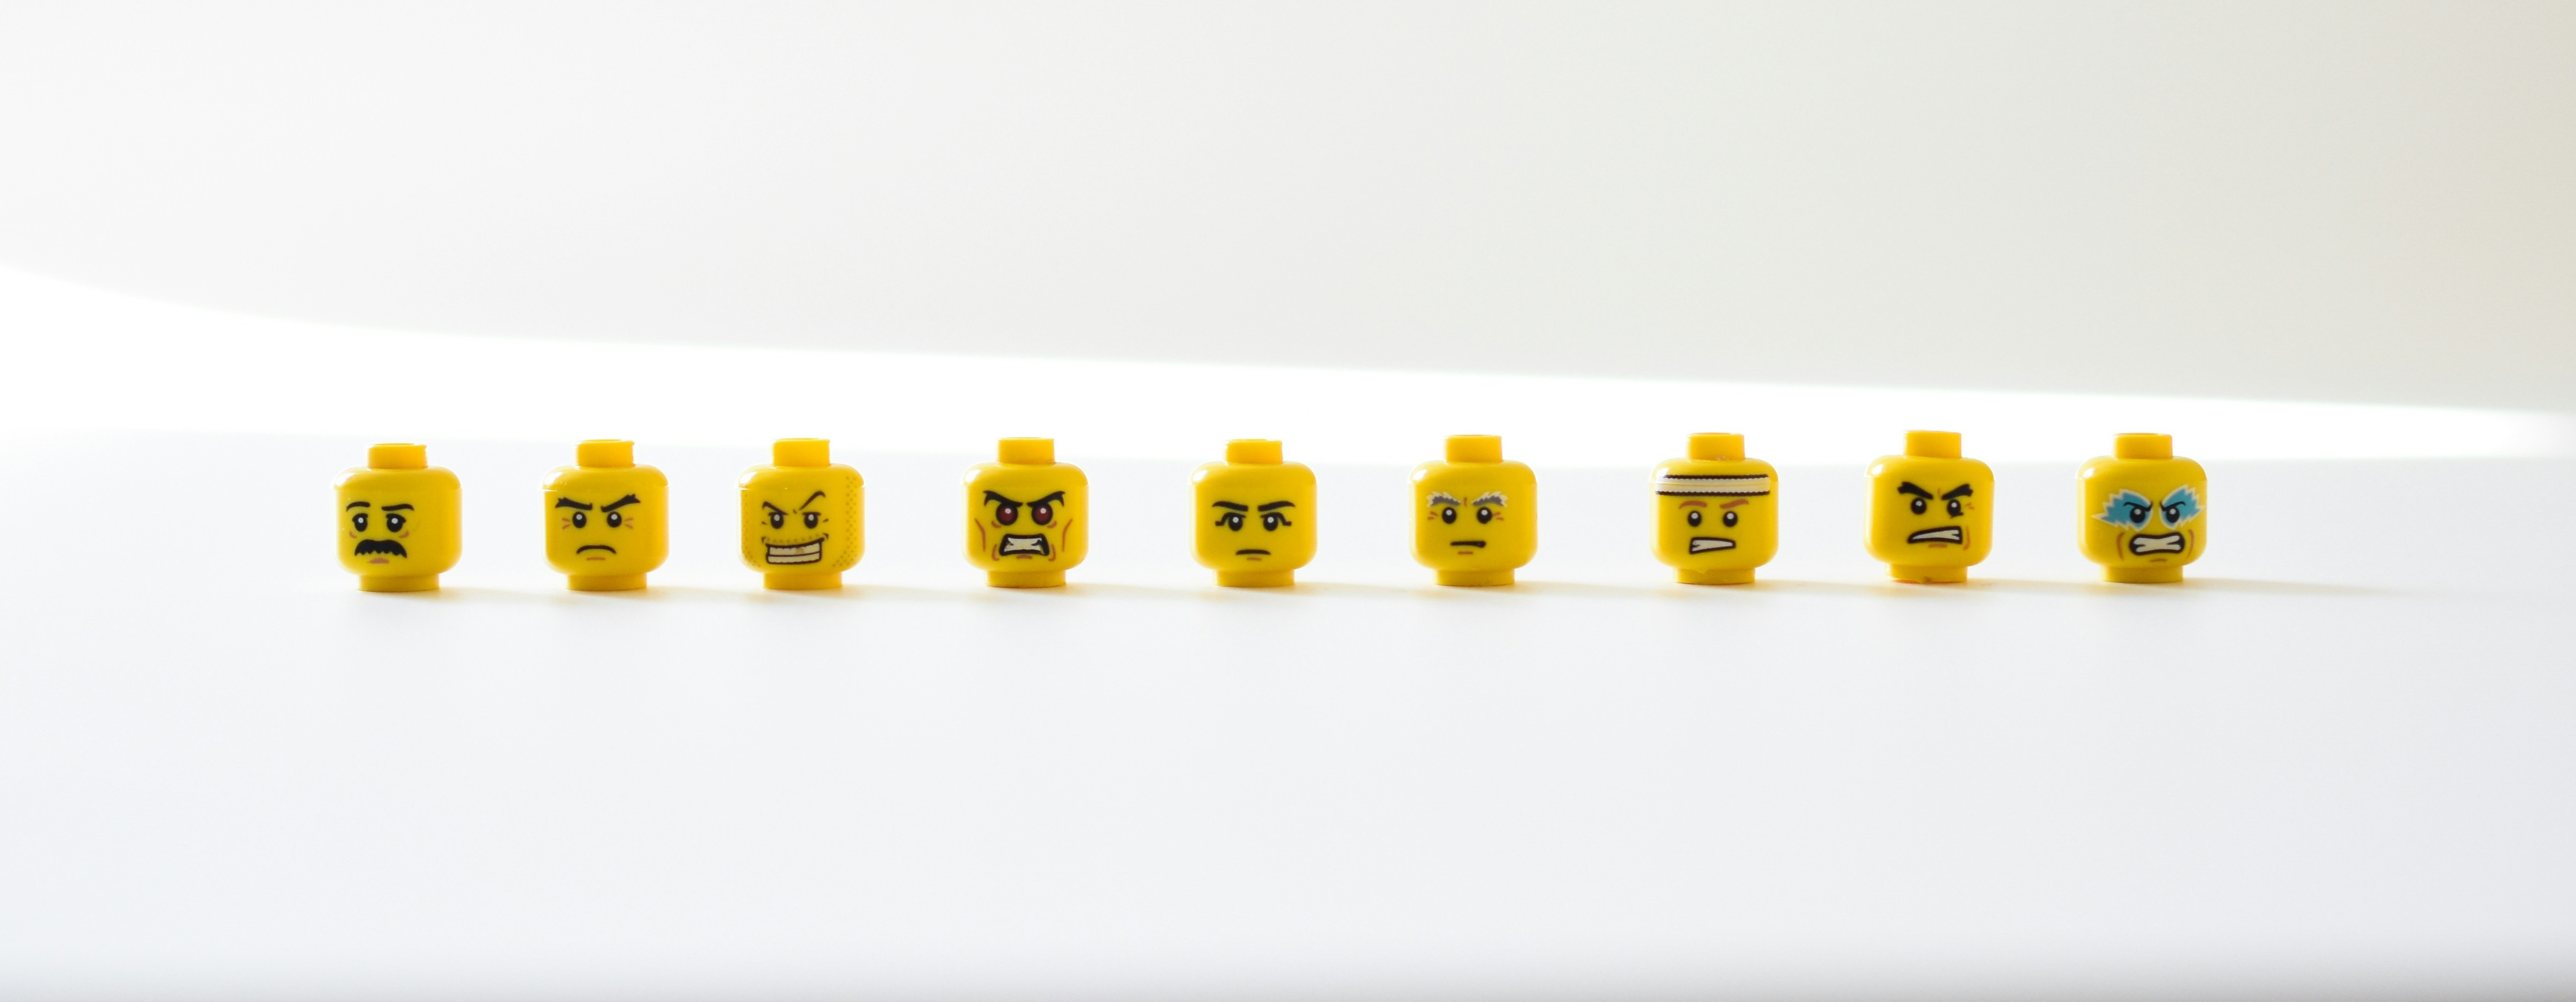
Foto de <a href="https://unsplash.com/pt-br/@helloimnik?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Nik</a> na <a href="https://unsplash.com/pt-br/fotografias/brinquedo-plastico-redondo-amarelo-e-branco-zYdYz7JlevE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

### Ferramentas:
NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn

### Referências:
- https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/datae
- https://scikit-learn.org/stable/modules/neighbors.html
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
- https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1
- https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://icmcjunior.com.br/random-forest/#:~:text=O%20que%20%C3%A9%20Random%20Forest,para%20chegar%20no%20resultado%20final.

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Importação das bibliotecas
</div>

Inicialmente iremos importar o ``NumPy``, ``Pandas``, utilizando respectivamente os alias ``np``, ``pd``.

Utilizaremos também bibliotecas para a construção de visuais gráficos, como o ``Seaborn`` e o ``Matplotlib``.

Por fim a biblioteca ``sklearn`` nos auxiliará com todo aparato dos modelos de machine learning, desde o pré-processamento até a validação final.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import random

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

import scipy as scp
from scipy.stats import randint

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Base de dados
</div>

A base de dados escolhida no site **Kaggle Datasets** consiste em informações de clientes de uma empresa de telecomunicação.

A base contém ``variáveis explicativas`` (*features*) sobre a assinatura, sobre o uso dos serviços contratados pelos clientes, e também o número de chamados no suporte que esse cliente fez. 

Por se tratar de um problema de classificação, a ``variável dependente`` (*target*) consiste no **churn**, que pode ser positivo caso o cliente tenha cancelado a sua assinatura, enquanto o negativo representa um cliente ativo.

A justificativa para essa escolha é a relevância deste assunto quando analisamos dados de negócios. Pois identificar potenciais clientes antes de um cancelamento baseado em suas informações de consumo pode evitar ocorrências de detratores, melhorar a reputação, relacionamento e inclusive conservar uma maior retenção de base e de caixa.

---
Não encontramos uma documentação completa contendo a descrição do que cada variável significa.

Portanto, para fins didáticos, vamos interpretar as 20 variáveis com a tipagem e descrição exibidas no quadro abaixo:

| Nome da Variável        | Tipo     | Descrição                                           |
|-------------------------|----------|-----------------------------------------------------|
| State                   | string   | O estado onde o cliente reside.                     |
| Account length          | integer  | Tempo total, em dias, da conta do cliente.          |
| Area code               | integer  | O código da área do número de telefone do cliente.  |
| International plan      | string   | Indica se o cliente tem um plano internacional.     |
| Voice mail plan         | string   | Indica se o cliente tem um plano de correio de voz. |
| Number vmail messages   | integer  | O número de mensagens de correio de voz.            |
| Total day minutes       | double   | O total de minutos utilizados durante o dia.        |
| Total day calls         | integer  | O total de chamadas feitas durante o dia.           |
| Total day charge        | double   | O total cobrado pelo uso durante o dia.             |
| Total eve minutes       | double   | O total de minutos utilizados durante a noite.      |
| Total eve calls         | integer  | O total de chamadas feitas durante a noite.         |
| Total eve charge        | double   | O total cobrado pelo uso durante a noite.           |
| Total night minutes     | double   | O total de minutos utilizados durante a noite.      |
| Total night calls       | integer  | O total de chamadas feitas durante a noite.         |
| Total night charge      | double   | O total cobrado pelo uso durante a noite.           |
| Total intl minutes      | double   | O total de minutos utilizados em chamadas internacionais. |
| Total intl calls        | integer  | O total de chamadas internacionais feitas.          |
| Total intl charge       | double   | O total cobrado pelo uso de chamadas internacionais. |
| Customer service calls  | integer  | O número de chamadas para o serviço de atendimento ao cliente. |
| Churn                   | string   | Indica se o cliente cancelou o serviço (churn).     |

<div style="background-color: lightgray; padding: 10px;">
    <h2> Importando a base de dados
</div>

No referido site estão disponíveis dois conjuntos de dados: ``churn-80`` e ``churn-20``.

Os dois conjuntos são do mesmo lote, mas foram divididos em uma proporção de 80/20. Como mais dados geralmente são desejáveis para desenvolver modelos de ML, vamos usar o conjunto maior (ou seja, **churn-80**) para fins de treinamento e teste, e o conjunto menor (ou seja, **churn-20**) para a validação final e avaliação de desempenho do modelo.

In [2]:
df = pd.read_csv('churn-bigml-80.csv',engine='python', sep=',')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(2666, 20)

**Nota:** Confirmando a documentação explicada na seção anterior, nota-se que temos disponíveis 2666 observações, 19 features para o treino e 1 target.

<div style="background-color: lightgreen; padding: 10px;">
    <h2> EDA - Análise exploratória dos dados
</div>

Uma vez realizado o carregamento da base de dados, avançamos para uma breve exploração da base de dados, interpretando como os dados de cada variável estão distribuídos (análise univariada):

In [4]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
df.describe()  

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df[['State', 'International plan', 'Voice mail plan', 'Churn']].describe()

,State,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666
unique,51,2,2,2
top,WV,No,No,False
freq,88,2396,1933,2278


In [8]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Pré Processamento
</div>

Etapa importante em todo projeto de machine learning, o pré-processamento é um processo de preparação, organização e estruturação dos nossos dados, além de ser o momento ideal para escolhermos quais dados fazem sentido fazerem parte do nosso dataset.

Nesta seção faremos os seguintes tratamentos:
- Split do conjunto de dados;
- Seleção de features;
- Split de Treino e Teste;
- Tratamento de variáveis categóricas;
- Normalização dos dados numéricos;

<div style="background-color: lightgray; padding: 10px;">
    <h2> Split do Conjunto de Dados
</div>

Agora que exploramos melhor nossos dados, a primeira coisa que devemos fazer é separar os dados em conjuntos. 

Sendo ``X`` para o conjunto das variáveis preditoras e ``y`` para o nosso vetor contendo a variável resposta:

In [9]:
# X =  colunas de informação, variáveis independentes
X = df.drop('Churn', axis=1)

# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['Churn']

In [10]:
# Verificando se X está com a coluna churn:
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [11]:
# Verificando y: 
y.shape

(2666,)

In [12]:
y.value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [13]:
# Atestando a proporção de churns positivos e negativos:
y.value_counts(normalize=True)

False    0.854464
True     0.145536
Name: Churn, dtype: float64

**Conclusão:** Fizemos a separação da matriz de variáveis explicativas (X) e nosso vetor contendo a variável resposta, target (y). Lembrando que a proporção dos clientes que são **churn**, é de aproximadamente 15,5%, enquanto 85,5% são de **não churn**.

<div style="background-color: lightgray; padding: 10px;">
    <h2> Seleção de features
</div>

A seleção de features é o processo de escolher um subconjunto das variáveis da base dados que são mais relevantes para o nosso problema. 

Isso é feito para reduzir a dimensionalidade dos dados, melhorar a eficiência computacional, remover características irrelevantes ou redundantes e melhorar o desempenho dos modelos de machine learning.

Para fins didáticos, e evitar também algum tipo de viés que possa se relacionar com a localização geográfica dos clientes, iremos remover as colunas ``State`` e ``Area Code``. Também retiraremos as colunas relacionadas à tarifa cobrada em cada tipo de ligação. Devido à ausência de documentação, não sabemos os critérios e regras de negócio estabelecidos para essas variáveis (``Total day charge``, ``Total eve charge``, ``Total night charge``, ``Total intl charge``).

In [14]:
# Realizando o drop das variáveis que não serão levadas em conta no modelo de classificação:
X = X.drop(['State','Area code','Total day charge','Total eve charge','Total night charge','Total intl charge'], axis=1)
X.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3


**Conclusão:** Conservamos as variáveis que dizem respeito ao consumo e utilização dos serviços pelos clientes. E essas serão as features disponíveis para os nossos modelos.

<div style="background-color: lightgray; padding: 10px;">
    <h2> Split de Treino e Teste
</div>

Nesta fase aplicaremos uma técnica usada em machine learning para permitir a avaliação o desempenho de um modelo. Trata-se de dividir o conjunto de dados em dois subconjuntos distintos:

- Conjunto de Treinamento:
Ele contém uma parte dos dados disponíveis e é usado para ajustar os parâmetros do modelo.
- Conjunto de Teste:
É usado para avaliar o desempenho do modelo treinado. Ele contém uma parte dos dados que não foram vistos durante o treinamento e é usado para fazer previsões e calcular métricas de avaliação, como precisão, recall, F1-score, entre outras.

In [77]:
# Definimos uma semente aleatória para conservar a divisão randômica:
# Obs.: Essa semente também será utilizada futuramente na otimização dos modelos,
# assim garantimos que a cada vez que processarmos o código, obtenhamos o mesmo resultado.

seed = 99
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=seed)

In [16]:
# Verificamos o tamanho de cada uma dessas bases (quantidade de observações e número de colunas):
X_train.shape

(1999, 13)

In [17]:
X_test.shape

(667, 13)

In [18]:
y_train.value_counts()

False    1706
True      293
Name: Churn, dtype: int64

In [19]:
y_test.value_counts()

False    572
True      95
Name: Churn, dtype: int64

**Conclusão:** Escolhemos uma proporção de 75/25 para a divisão entre treino e teste. Sendo assim, a base de treino fica com 1999 observações, e a de teste com 667 linhas.

<div style="background-color: lightgray; padding: 10px;">
    <h2> Tratamento de variáveis categóricas
</div>

Realizando a conversão de atributos categóricos para numéricos de acordo com o respectivo indice.

Aplicação da técnica One Hot Encoder

Transformar as labels em números
.
O OneHotEncoder gera novas colunas com valor 0 ou 1, aonde 1 representa a ocorrência daquela caracteristica e 0 a não ocorrência..

Iremos aplicar o método ``fit_transform``, usado para aprender e aplicar uma transformação aos dados de treinamento, e em seguida o ``transform``,  usado apenas para aplicar a transformação aprendida aos dados de teste, garantindo consistência e evitando vazamento de dados durante a avaliação do modelo.

In [20]:
one_hot = OneHotEncoder()

In [21]:
# Definindo as colunas categóricas do DataFrame
categorical_cols = ['International plan', 'Voice mail plan']
X_train_categorical = X_train[categorical_cols]
X_test_categorical = X_test[categorical_cols]

# Aplicando o OneHot Encoder apenas nas colunas categóricas:
X_train_encoded = one_hot.fit_transform(X_train_categorical)
X_test_encoded = one_hot.transform(X_test_categorical)

# Obtendo os nomes das novas colunas do OneHot Encoder
encoded_cols = one_hot.get_feature_names_out(categorical_cols)

# Convertendo os ndarrays em DataFrames e mantendo os mesmos índices:
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoded_cols, index=X_train_categorical.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoded_cols, index=X_test_categorical.index)

# Removendo as colunas categóricas originais da base de treino e teste
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

# Concatenando os DataFrames de treino e teste com os DataFrames após o encoder
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test, X_test_encoded_df], axis=1)

In [22]:
# Verificando a aparência final das colunas das nossas bases de treino e teste:
X_train_final.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2130,104,0,138.7,100,215.4,58,164.3,98,4.9,4,2,1.0,0.0,1.0,0.0
2343,127,0,256.5,87,222.1,101,156.7,122,13.0,3,1,0.0,1.0,1.0,0.0
317,150,0,126.0,99,238.5,73,285.1,100,10.2,6,3,1.0,0.0,1.0,0.0
323,84,0,181.5,129,130.7,112,186.5,118,8.5,4,1,1.0,0.0,1.0,0.0
1951,16,0,110.0,91,147.3,75,190.5,73,6.4,7,0,0.0,1.0,1.0,0.0


In [23]:
X_test_final.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
670,129,0,198.4,91,264.7,106,111.4,101,9.2,2,2,1.0,0.0,1.0,0.0
521,87,22,263.8,65,103.4,115,208.1,109,8.5,3,3,1.0,0.0,0.0,1.0
2385,147,35,197.3,134,141.1,99,212.1,90,10.1,4,2,1.0,0.0,0.0,1.0
2139,88,0,301.5,136,257.7,72,132.9,118,13.4,2,4,1.0,0.0,1.0,0.0
267,54,0,272.6,83,248.7,74,197.4,111,9.5,2,1,1.0,0.0,1.0,0.0


**Conclusão:** Após realizar as operações com o one hot encoder, verificamos que houve a criação de 4 novas variáveis:
- International plan_No;
- International plan_Yes;
- Voice mail plan_No;
- Voice mail plan_Yes;

Desse modo, nós removemos as colunas iniciais ``International plan``, ``Voice mail plan`` de nossas bases de treino e teste.

<div style="background-color: lightgray; padding: 10px;">
    <h2> Normalização dos dados numéricos
</div>

Etapa também conhecida como **Feature Scaling**, onde podemos reduzir a escala numérica das colunas, para que todas estejam dentro de uma mesma escala de valor.

Esse processo é utilizado pois cada variável pode ser representada em diversas escalas diferentes. Se houverem medidas com escalas de valor muito discrepantes a distância calculada pelo algorítimo será influênciada podendo gerar resultados errôneos.

Entre os métodos conhecidos para essa etapa estão a **Normalização** e a **Padronização em Z-Scores**.

O ``StandardScaler`` é uma técnica de normalização que nos permite padronizar os valores das observações removendo a média e dimensionando para a variância unitária. Isso significa que, para cada característica, o ``StandardScaler`` subtrai a média da característica e divide pelo desvio padrão, resultando em uma distribuição com média zero e desvio padrão igual a 1.

$$ z = \frac{x - \mu}{\sigma} $$

Nesta fórmula:

- $z$ representa o valor padronizado da característica.
- $x$ representa o valor original da característica.
- $\mu$ representa a média da característica.
- $\sigma$ representa o desvio padrão da característica.

Isso resulta em uma distribuição com média zero e desvio padrão igual a 1.

In [24]:
# Instanciamos o scaler e realizamos o ajuste e transformação na base de treino
# Por fim, transformamos a base de teste com esses mesmos ajustes:
scaler = StandardScaler()  
scaler.fit(X_train_final)

X_train_final = scaler.transform(X_train_final)  
X_test_final = scaler.transform(X_test_final) 

**Conclusão:** Após realizar a padronização dos dados, podemos atestar em uma das variáveis quaisquer que as condições (média 0 e desvio-padrão 1) foram atendidas:

In [25]:
X_train_final[:,1].mean()

3.376766378049501e-17

In [26]:
X_train_final[:,1].std()

1.0

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Treinamento do Modelo KNN
</div>

O treinamento de um modelo de classificação é o processo de ajustar os parâmetros do modelo usando um conjunto de dados de treinamento. O objetivo é que o modelo aprenda com as variáveis de entrada e de saída fornecidas.

Dessa forma, nesta seção nos dedicaremos às seguintes etapas:
- Construção do modelo na base de treino;
- Avaliação na base de testes;
- Otimização dos hiperparâmetros;
- Resultado otimizado na base de testes;
- Resultado final na base de validação;

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Treinamento KNN
</div>

**K-Nearest Neighbors (KNN)** é um algoritmo de machine learning que pode ser usado tanto para regressão, quanto classificação. No contexto de nosso trabalho, utilizaremos como algoritmo de classificação, pois nossa variável target, trata-se de uma variável categórica binária.

A classificação é calculada a partir de uma votação majoritária simples dos vizinhos mais próximos de cada ponto. Portanto, primeiramente definimos o valor de k, em seguida são calculadas as distâncias entre cada um dos pontos, e por fim, é feito o levantamento dos k vizinhos e define-se o resultado de uma observação com o valor da classe de dados que possui a maioria dos votos dentre esses vizinhos.

Utilizaremos a configuração padrão do algoritmo, que utiliza o cálculo da distância euclidiana entre os pontos:

In [27]:
# Definindo o classificador KNN com o número de 10 vizinhos para nosso modelo de partida
classifier = KNeighborsClassifier(n_neighbors=10)  

# Treinando o modelo, com os dados de treino após o pré-processamento
classifier.fit(X_train_final, y_train) 

KNeighborsClassifier(n_neighbors=10)

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Teste do Modelo
</div>

Após o treinamento, o nosso modelo KNN está pronto para fazer previsões sobre novos dados (base de testes).

Portanto, baseado nos parâmetros que nosso modelo se ajustou na **base de treinamento**, valos calcular uma previsão para o churn (``y_pred``), utilizando os dados de entrada da **base de testes**:

In [28]:
# Prevendo os valores de y para os dados de teste (X_test_final)
y_pred = classifier.predict(X_test_final) 

Agora podemos prosseguir para a avaliação desse resultado. 

Para tal, vamos fazer uso da **matriz de confusão**, da avaliação das **métricas de validação** do modelo e também do cálculo da **acurácia**:

In [29]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação:
print("Métricas de classificação: \n", classification_report(y_test, y_pred))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_test, y_pred))

Matriz de Confusão: 
[[568   4]
 [ 76  19]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.88      0.99      0.93       572
        True       0.83      0.20      0.32        95

    accuracy                           0.88       667
   macro avg       0.85      0.60      0.63       667
weighted avg       0.87      0.88      0.85       667

Acurácia:  0.8800599700149925


In [30]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.5965034965034964


<Figure size 800x600 with 0 Axes>

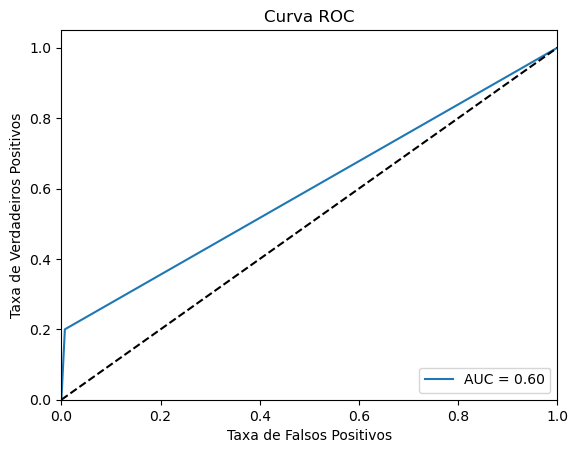

In [31]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão:** Nosso modelo inicial obteve 88% de acurácia, isso pode parecer bom, porém, em uma base contendo 85% de clientes com churn negativo, isso **não** significa uma boa métrica. Afinal, um modelo dummy acertaria em 85% dos casos, se escolhessemos toda y_pred como sendo ``churn = False``.

Portanto, analisando mais precisamente a sensibilidade em classificar corretamente a classe com churn positivo, acertamos **apenas** 19 churns do total de 95 observações da classe positiva (Recall = 20%). Para um modelo de classificação isso não é satisfatório.

A área sob a curva ROC foi de 0.596, e é possível notar no gráfico que houve pouco distanciamento da linha tracejada que representa um modelo dummy.

No caso da classe positiva, o modelo obteve um recall de 99%. Ou seja, o modelo inicial de KNN é bom em classificar clientes com churn negativo, porém é ruim para classificar a classe positiva.



<div style="background-color: lightgray; padding: 10px;">
    <h3>  Otimização de Hiperparâmetros
</div>

Com o objetivo de melhorar a performance de um modelo, podemos utilizar um processo de **otimização de hiperparâmetros**, sendo necessário realizar o treinamento do modelo diversas vezes. 

Desse modo, podemos realizar os testes e validar se o desempenho do nosso modelo obteve melhorias com base nos hiperparâmetros e valores definidos para eles:

In [32]:
error = []

# Iremos calcular o erro médio na classificação para um valor de K de 1 até 15:
for i in range(1, 16):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_final, y_train)
    pred_i = knn.predict(X_test_final)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro Médio')

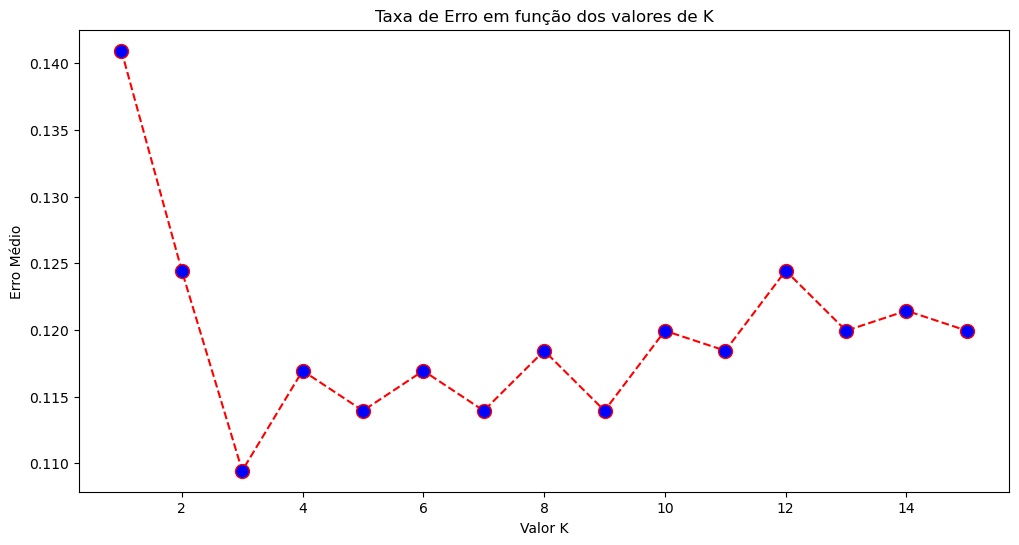

In [33]:
# Agora com o auxílio da biblioteca matplotlib, vamos plotar o erro para cada um dos valores de K:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 16), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de Erro em função dos valores de K')  
plt.xlabel('Valor K')  
plt.ylabel('Erro Médio')  

**Conclusão:** O valor de K que minimizou o erro foi ``K=3``.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Teste final otimizado
</div>

Agora podemos avançar para o teste com os parâmetros otimizados em nossa base de testes, visto que ``K=3`` foi o que minimizou o erro:

In [34]:
# Definindo o valor de vizinhos para K=3:
classifier = KNeighborsClassifier(n_neighbors=3)  

#Treinando o novo modelo otimizado:
classifier.fit(X_train_final, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Prevendo os valores de y para os dados de teste (X_test_final)
y_pred = classifier.predict(X_test_final) 

In [36]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação:
print("Métricas de classificação: \n", classification_report(y_test, y_pred))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_test, y_pred))

Matriz de Confusão: 
[[556  16]
 [ 57  38]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.91      0.97      0.94       572
        True       0.70      0.40      0.51        95

    accuracy                           0.89       667
   macro avg       0.81      0.69      0.72       667
weighted avg       0.88      0.89      0.88       667

Acurácia:  0.8905547226386806


In [37]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.686013986013986


<Figure size 800x600 with 0 Axes>

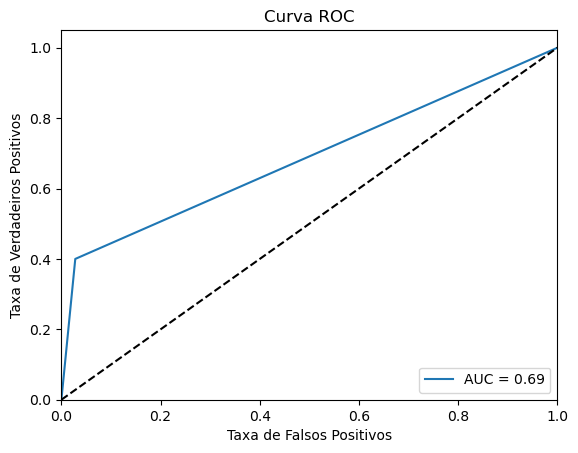

In [38]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão:** De fato nosso modelo otimizado obteve uma pequena melhora na acurácia, subindo para 89%. Acertamos agora 38 churns do total de 95 observações da classe positiva (Recall = 40%). Houve uma melhora significativa, embora não seja um grande resultado.

A área sob a curva ROC foi aumentou para 0.68.

No caso da classe positiva, o modelo obteve um recall de 97%. Ou seja, tivemos uma melhora significativa na classificação da classe positiva, e uma pequena perda de qualidade para classificar a classe negativa.



<div style="background-color: lightgray; padding: 10px;">
    <h3>  Base de Validação
</div>

Agora que calibramos e otimizamos nosso modelo KNN, vamos dar início à validação na base final do modelo:

In [39]:
df_validation = pd.read_csv('churn-bigml-20.csv',engine='python', sep=',')
df_validation.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


<div style="background-color: lightgray; padding: 10px;">
    <h3>  Transformação
</div>

Verificamos a presença das mesmas colunas da base inicial. Sendo assim, precisaremos realizar também um pré-processamento, isto é, os mesmos processos de transformação que foram feitos na base de testes:

In [40]:
# Separamos as features da target na base de validação e removemos as colunas desconsideradas:
# X_validation = variáveis independentes da nossa base de validação
X_validation = df_validation.drop(['Churn','State','Area code','Total day charge',
                                   'Total eve charge','Total night charge','Total intl charge'], axis=1)

# y_validation = Variável dependente, a qual será utilizada para avaliar o modelo
y_validation = df_validation['Churn']

In [41]:
y_validation.value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [42]:
y_validation.value_counts(normalize=True)

False    0.857571
True     0.142429
Name: Churn, dtype: float64

**Nota:** Verificamos que a base de validação também possui uma target com uma proporção das classes semelhante à base de treino.

---
Avançamos para a transformação utilizando ``one hot encoder``. 

Vamos aplicar apenas o ``transform``, pois já fizemos o ``fit`` desde o nosso pré-processamento na base de treino:

In [43]:
categorical_cols = ['International plan', 'Voice mail plan']
X_validation_categorical = X_validation[categorical_cols]

# Aplicando o OneHot Encoding apenas nas colunas categóricas:
X_validation_encoded = one_hot.transform(X_validation_categorical)

# Obtendo os nomes das novas colunas do OneHot Encoding
encoded_cols = one_hot.get_feature_names_out(categorical_cols)

# Convertendo as matrizes esparsas em DataFrames e mantendo os mesmos índices dos DataFrames categóricos
X_validation_encoded_df = pd.DataFrame(X_validation_encoded.toarray(), columns=encoded_cols, index=X_validation_categorical.index)

# Removendo as colunas categóricas originais da base de treino original
X_validation = X_validation.drop(columns=categorical_cols)

# Concatenando o DataFrame de treino original com o DataFrame resultante do OneHot Encoding
X_validation_final = pd.concat([X_validation, X_validation_encoded_df], axis=1)

In [44]:
X_validation_final.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,117,0,184.5,97,351.6,80,215.8,90,8.7,4,1,1.0,0.0,1.0,0.0
1,65,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1.0,0.0,1.0,0.0
2,161,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1.0,0.0,1.0,0.0
3,111,0,110.4,103,137.3,102,189.6,105,7.7,6,2,1.0,0.0,1.0,0.0
4,49,0,119.3,117,215.1,109,178.7,90,11.1,1,1,1.0,0.0,1.0,0.0


---
Aplicamos também a mesma transformação de ``feature scaling``:

In [45]:
X_validation_final = scaler.transform(X_validation_final) 

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Validação final
</div>

Após o pré-processamento, estamos prontos para submeter o nosso modelo KNN para a validação final.

Portanto, baseado nos parâmetros que nosso modelo se ajustou no **treino e teste**, valos calcular uma previsão para o churn (``y_pred_validation``), utilizando os dados finais otimizados:

In [46]:
# Definindo o valor de vizinhos
classifier = KNeighborsClassifier(n_neighbors=3)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train_final, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [47]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_pred_validation = classifier.predict(X_validation_final) 

In [48]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_validation, y_pred_validation), "\n")  

# Imprimindo o relatório de classificação:
print("Relatório de classificação: \n", classification_report(y_validation, y_pred_validation))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_validation, y_pred_validation))

Matriz de Confusão: 
[[560  12]
 [ 61  34]] 

Relatório de classificação: 
               precision    recall  f1-score   support

       False       0.90      0.98      0.94       572
        True       0.74      0.36      0.48        95

    accuracy                           0.89       667
   macro avg       0.82      0.67      0.71       667
weighted avg       0.88      0.89      0.87       667

Acurácia:  0.8905547226386806


In [49]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_validation, y_pred_validation)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6684578579315422


<Figure size 800x600 with 0 Axes>

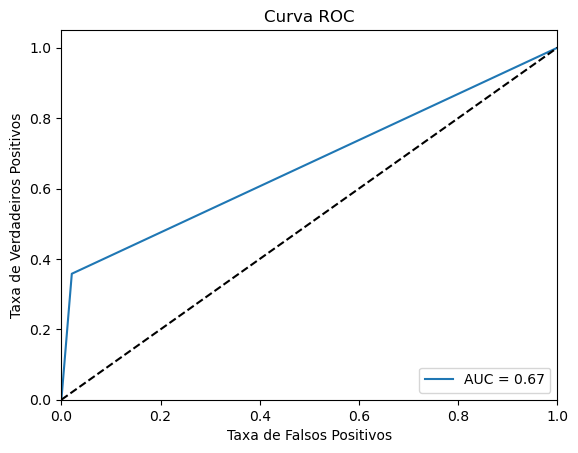

In [50]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_validation)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão da validação:** Nosso modelo otimizado manteve sua acurácia de 89%. Acertamos agora 34 churns do total de 95 observações da classe positiva (Recall = 46%). Houve uma pequena redução, embora não seja ainda um resultado ruim.

A área sob a curva ROC foi de 0.67 aproximadamente.

No caso da classe positiva, o modelo obteve um recall de 98%. Mantivemos uma boa classificação da classe positiva, e uma pequena perda de qualidade para classificar a classe negativa.

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Treinamento do Modelo Random Forest
</div>

O algoritmo **Random Forest** (Floresta Aleatória em português) é um algoritmo de aprendizado de máquina supervisionado utilizado para realizar predições. Resumidamente, o algoritmo cria de forma aleatória várias Árvores de Decisão (Decision Trees) e combina o resultado de todas elas para chegar no resultado final.

Imagem ilustrativa de um modelo Random Forest:
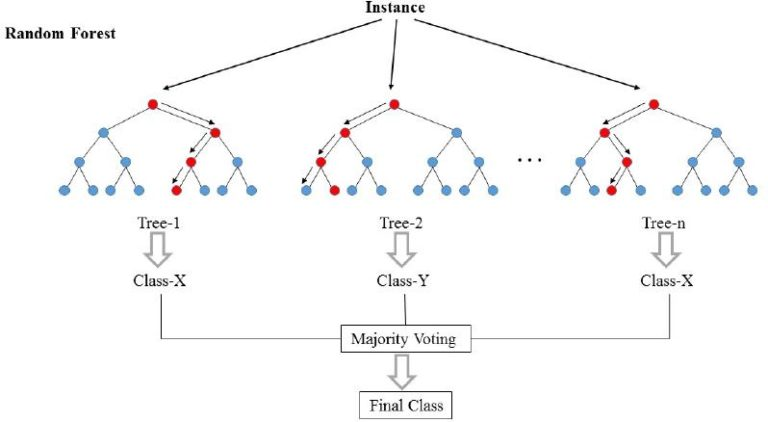!


Isso ajuda a melhorar a precisão das previsões e a evitar problemas de superajuste (*overfitting*). As random forests usam uma estratégia de divisão que procura a melhor divisão em cada etapa, o que significa que elas tentam dividir os dados da melhor maneira possível.

Para isso, vamos especificar alguns parâmetros como:
- número de árvores (``n_estimators``) = 100;
- critério de divisão (``criterion``) = impureza de Gini;
- profundidade máxima da árvore (``max_depth`` = None) até o quanto for necessário;
- entre outros parâmetros;

In [51]:
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1)

#Treinando o modelo, com dados de treinamento
rf.fit(X_train_final, y_train)

RandomForestClassifier()

In [52]:
y_pred_rf_train = rf.predict(X_train_final)

In [53]:
# Imprimindo a matriz de confusão de treino:
print("Matriz de Confusão: ")
print(confusion_matrix(y_train, y_pred_rf_train), "\n")  

# Imprimindo o relatório de classificação de treino:
print("Métricas de classificação: \n", classification_report(y_train, y_pred_rf_train))  

# Imprimindo o quão acurado foi o modelo no treino:
print('Acurácia: ' , accuracy_score(y_train, y_pred_rf_train))

Matriz de Confusão: 
[[1706    0]
 [   0  293]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1706
        True       1.00      1.00      1.00       293

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999

Acurácia:  1.0


**Conclusão:** Apenas para fins didáticos, verificamos que o modelo na base de treino alcançou o ajuste máximo, de 100% de acurácia.



<div style="background-color: lightgray; padding: 10px;">
    <h3>  Teste do Modelo
</div>

Após o treinamento, o nosso modelo de Random Forests está pronto para fazer nossa primeira avaliação na base de testes:

In [54]:
y_pred_rf = rf.predict(X_test_final)

In [55]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_test, y_pred_rf), "\n")  

# Imprimindo o relatório de classificação:
print("Métricas de classificação: \n", classification_report(y_test, y_pred_rf))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_test, y_pred_rf))

Matriz de Confusão: 
[[568   4]
 [ 31  64]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.94      0.67      0.79        95

    accuracy                           0.95       667
   macro avg       0.94      0.83      0.88       667
weighted avg       0.95      0.95      0.94       667

Acurácia:  0.9475262368815592


In [56]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8333456017666543


<Figure size 800x600 with 0 Axes>

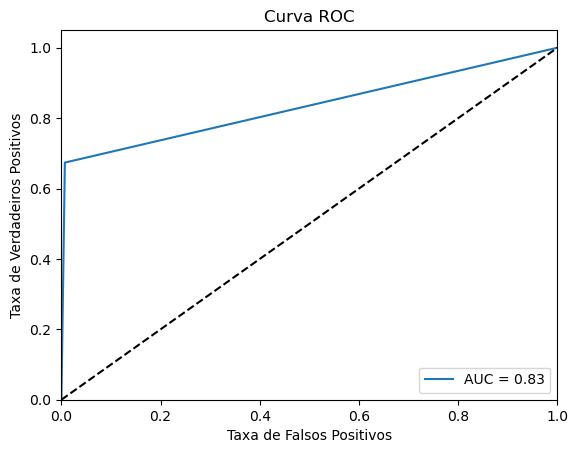

In [57]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão:** Nosso modelo inicial obteve 94% de acurácia. Acertamos 64 churns do total de 95 observações da classe positiva (Recall = 67%).

A área sob a curva ROC foi de 0.83, e é possível notar no gráfico uma maior área, e mais distante da linha tracejada que representa um modelo dummy.

No caso da classe positiva, o modelo obteve um recall de 99%. Ou seja, o modelo inicial é excelente em classificar a classe negativa, e regular na classe positiva. Isso indica que ele pode ter ficado com ``overfitting``.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Otimização de Hiperparâmetros
</div>

Com o objetivo de melhorar a performance das random forests vamos prosseguir para **otimização de hiperparâmetros**.

Agora utilizando a um algoritmo chamado ``RandomizedSearchCV``, e passamos alguns intervalos como opções de parâmetros para essa busca. Escolhemos 3 parâmetros apenas, para evitar muito custo computacional:

In [58]:
param_dist = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': randint(1,30),
              'criterion': ['gini','entropy']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 scoring='accuracy',
                                 random_state=seed)

# Fit the random search object to the data
rand_search.fit(X_train_final, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 300}


**Conclusão:** O melhores hiperparâmetros encontrados foram:
- critério = Entropia;
- profundidade máxima = 24;
- número de árvores = 300;

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Teste final otimizado
</div>

Agora podemos avançar para a avaliação com os parâmetros otimizados. Primeiro, para conferência do desempenho, iremos avaliá-lo na base de treino:

In [59]:
y_pred_rf_train = best_rf.predict(X_train_final)

In [60]:
# Imprimindo a matriz de confusão de treino otimizado:
print("Matriz de Confusão: ")
print(confusion_matrix(y_train, y_pred_rf_train), "\n")  

# Imprimindo o relatório de classificação de treino otimizado:
print("Métricas de classificação: \n", classification_report(y_train, y_pred_rf_train))  

# Imprimindo o quão acurado foi o modelo no treino otimizado:
print('Acurácia: ' , accuracy_score(y_train, y_pred_rf_train))

Matriz de Confusão: 
[[1706    0]
 [   0  293]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1706
        True       1.00      1.00      1.00       293

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999

Acurácia:  1.0


---
Agora avançamos para o nosso teste final otimizado:

In [61]:
y_pred_rf = best_rf.predict(X_test_final)

In [62]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_test, y_pred_rf), "\n")  

# Imprimindo o relatório de classificação:
print("Métricas de classificação: \n", classification_report(y_test, y_pred_rf))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_test, y_pred_rf))

Matriz de Confusão: 
[[567   5]
 [ 28  67]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.93      0.71      0.80        95

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667

Acurácia:  0.9505247376311844


In [63]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC:", roc_auc)

ROC AUC: 0.848260949576739


<Figure size 800x600 with 0 Axes>

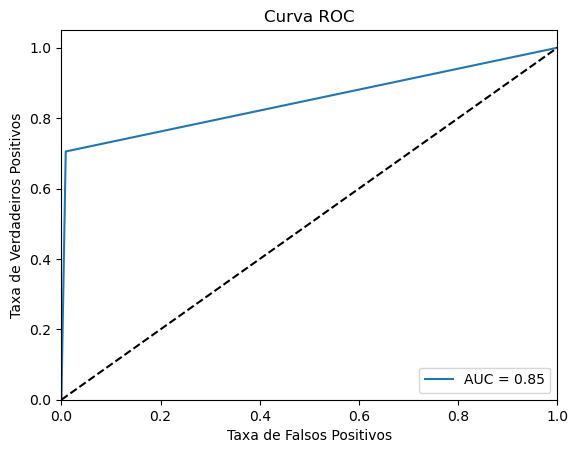

In [64]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão:** Nosso modelo otimizado alcançou 95% de acurácia. Acertamos 67 churns do total de 95 observações da classe positiva (Recall = 71%), uma ligeira melhora. O modelo manteve o recall de 99% na classe positiva.

A área sob a curva ROC foi de 0.848, mantendo aprox. a mesma distância da linha tracejada, com uma ligeira melhora.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Avaliação final na base de validação
</div>

Agora que calibramos e otimizamos nosso modelo de Random Forests, vamos dar início à avaliação na base de validação.

Lembrando que esta base é a mesma que utilizamos na validação do modelo KNN, portanto, ela já passou pelo processo de pré-processamento com o ``transform`` de encoding e scaler.

In [71]:
y_pred_rf_valid = best_rf.predict(X_validation_final)

In [66]:
# Imprimindo a matriz de confusão:
print("Matriz de Confusão: ")
print(confusion_matrix(y_validation, y_pred_rf_valid), "\n")  

# Imprimindo o relatório de classificação:
print("Métricas de classificação: \n", classification_report(y_validation, y_pred_rf_valid))  

# Imprimindo o quão acurado foi o modelo:
print('Acurácia: ' , accuracy_score(y_validation, y_pred_rf_valid))

Matriz de Confusão: 
[[570   2]
 [ 36  59]] 

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       572
        True       0.97      0.62      0.76        95

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.94       667

Acurácia:  0.9430284857571214


In [67]:
# Calculando a área sobre a curva ROC:
roc_auc = roc_auc_score(y_validation, y_pred_rf_valid)
print("ROC AUC:", roc_auc)

ROC AUC: 0.808778064041222


<Figure size 800x600 with 0 Axes>

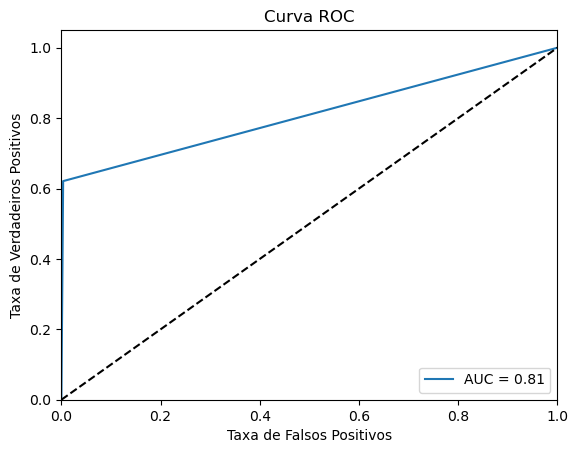

In [68]:
# Plotando a curva ROC com o AUC usando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_rf_valid)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')  # Adicionando a linha diagonal para referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

**Conclusão:** Nosso modelo otimizado alcançou 95% de acurácia. Acertamos 67 churns do total de 95 observações da classe positiva (Recall = 71%), uma ligeira melhora. O modelo manteve o recall de 99% na classe positiva.

A área sob a curva ROC foi de 0.84, mantendo aprox. a mesma distância da linha tracejada. Mas, ainda é questionável a ocorrência de ``overfitting``, visto que saímos de 1 na curva ROC de treino, para 0.808 na base de validação.

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Conclusões finais
</div>

Este projeto buscou aplicar os conhecimentos aprendidos na disciplina de ``Machine Learning I`` por meio da aplicação prática em um problema de classificação que simule a realidade.

Foi possível explorar uma amostra de dados de **clientes** de uma operadora de telecomunicações contando com ``2666 observações e 20 colunas``.

Durante a etapa inicial, estivemos atentos em documentar a base de dados e realizar o seu carregamento.

Em seguida, após a leitura e carregamento, realizamos uma breve análise exploratória, buscando entender melhor sobre a distribuições dos dados quantitativos e extraímos suas estatísticas descritivas. Aferimos também a proporção da variável churn, na classe positiva e negativa.

O ponto principal do trabalho contou com todas as etapas necessárias de um projeto de machine learning: o pré processamento, treinamento de um modelo, testes, otimizações de hiperparâmetros e validação final.

Desse modo, aplicamos todos esses conceitos aprendidos em sala de aula e realizamos a implementação de 2 algoritmos supervisionados para classificação:
- KNN;
- Random Forests;

---
Abaixo, vamos recapitular as métricas de avaliação na base de validação, de cada um deles:

In [72]:
# Imprimindo o relatório de classificação para o modelo KNN:
print("Relatório de classificação: \n", classification_report(y_validation, y_pred_validation))  

# Imprimindo o quão acurado foi o modelo KNN:
print('Acurácia: ' , accuracy_score(y_validation, y_pred_validation))

Relatório de classificação: 
               precision    recall  f1-score   support

       False       0.90      0.98      0.94       572
        True       0.74      0.36      0.48        95

    accuracy                           0.89       667
   macro avg       0.82      0.67      0.71       667
weighted avg       0.88      0.89      0.87       667

Acurácia:  0.8905547226386806


In [73]:
# Imprimindo o relatório de classificação do modelo Random Forests:
print("Métricas de classificação: \n", classification_report(y_validation, y_pred_rf_valid))  

# Imprimindo o quão acurado foi o modelo Random Forests: 
print('Acurácia: ' , accuracy_score(y_validation, y_pred_rf_valid))

Métricas de classificação: 
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       572
        True       0.97      0.62      0.76        95

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.94       667

Acurácia:  0.9430284857571214


---
Sendo assim, após um exame dos resultados, identificamos que o modelo **Random Forests** apresentou melhor desempenho em suas métricas de avaliação.
Destacamos não só o aumento da acurácia em relação ao KNN, mas principalmente o grande ganho no Recall da classe positiva, que é aquilo que desejamos maximizar.

Ressaltamos que durante o trabalho, buscamos aplicar todos os conceitos abordados em sala de aula.
Mas, cabe como observação, que para levar esse modelo para produção, deveríamos investir mais tempo otimizando os hiperparâmetros, de modo a evitar o sobreajuste (*overfitting*), visto que houve um sobreajuste na base de treino, e uma perda de eficiência da base de teste para a validação, diminuindo o poderio de generalização do modelo.

Obrigado pela atenção, fiquem a vontade para sugerir correções e melhorias.